## Objective:   Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

##### Note:
1. The project does not involve any business based objective.
2. The purpose of the project is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [1]:
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd #For creating, analyzing/dataprocessing dataframes.
import matplotlib.pyplot as plt # For visualization of data.
import seaborn as sns           # For visualization of data. 
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, StratifiedKFold # To do cross_validation on the model to check its performance.
from sklearn.preprocessing import StandardScaler     #To Normalize the data without changing the shape of the distribution.
from statsmodels.stats.outliers_influence import variance_inflation_factor    #To test the multicollinearity between the features.
from sklearn.svm import SVC    # To create model using Support Vector Classifier.
from sklearn.metrics import accuracy_score     #To measure the performance of the model.
from sklearn.decomposition import PCA          #To peerform Dimensionality Reduction using Principal Component Analysis.
import warnings
warnings.filterwarnings(action = 'ignore') #To eleminate future warnings.

### Step 2: Understanding the Data:

#### a. Reading the Data and structure of the file:

In [2]:
data = pd.read_csv('vehicle.csv') #For Importing the data.
data #For visualizing the imported data.

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

#### b.Understanding the shape of the Data:

In [25]:
data.shape #To know about the shape of the data.

(846, 19)

##### Inference on the above output:

The data contains 195 number of records and 24 number of attributes (23 features and 1 label).

##### Inference on the above output:

1. There are 18 columns with one column as label, totally 19 columns in this file.
2. the structure of the file is in form of dataframe, which is read using pandas and input in to this notebook.

#### No.of records with respect to labels:

car    429
bus    218
van    199
Name: class, dtype: int64

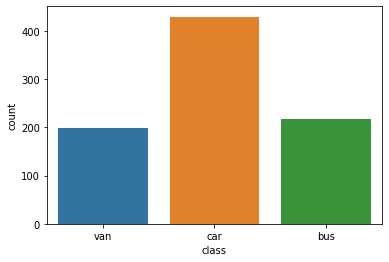

In [3]:
sns.countplot(data['class']) #To visualize the categorical column.
data['class'].value_counts() # Finding the no. of observations in each category

In [6]:
data['class'] = pd.Categorical(data['class']).codes #Converting the categorical column into the form of numbers assigned to each category.
data['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

##### Inference on the above output:

1. The number of observations for each class was found.
2. Classes which were in the non-numeric form were converted into numeric form.

#### c.Understanding the informations about the Data and ype of attributes of the data:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

##### Inference on the above output:
1. All attributes are of quantitative datatype except the class attribute.
2. Class attribute is of Qalitative data type in the form of trinomial category type.

#### d. Measure of Central Tendancy and Measure of Dispersion:

##### Five Number summary:

The Five point summary are:
1. Maximum value
2. 25% quartile
3. Median(50% quartile)
4. 75% quartile
5. Minimum value
    
The above mentioned five points for numerical attributes in the dataframe along with the other descriptive statistics are also available below.

In [4]:
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

##### Five Point summary visualization:

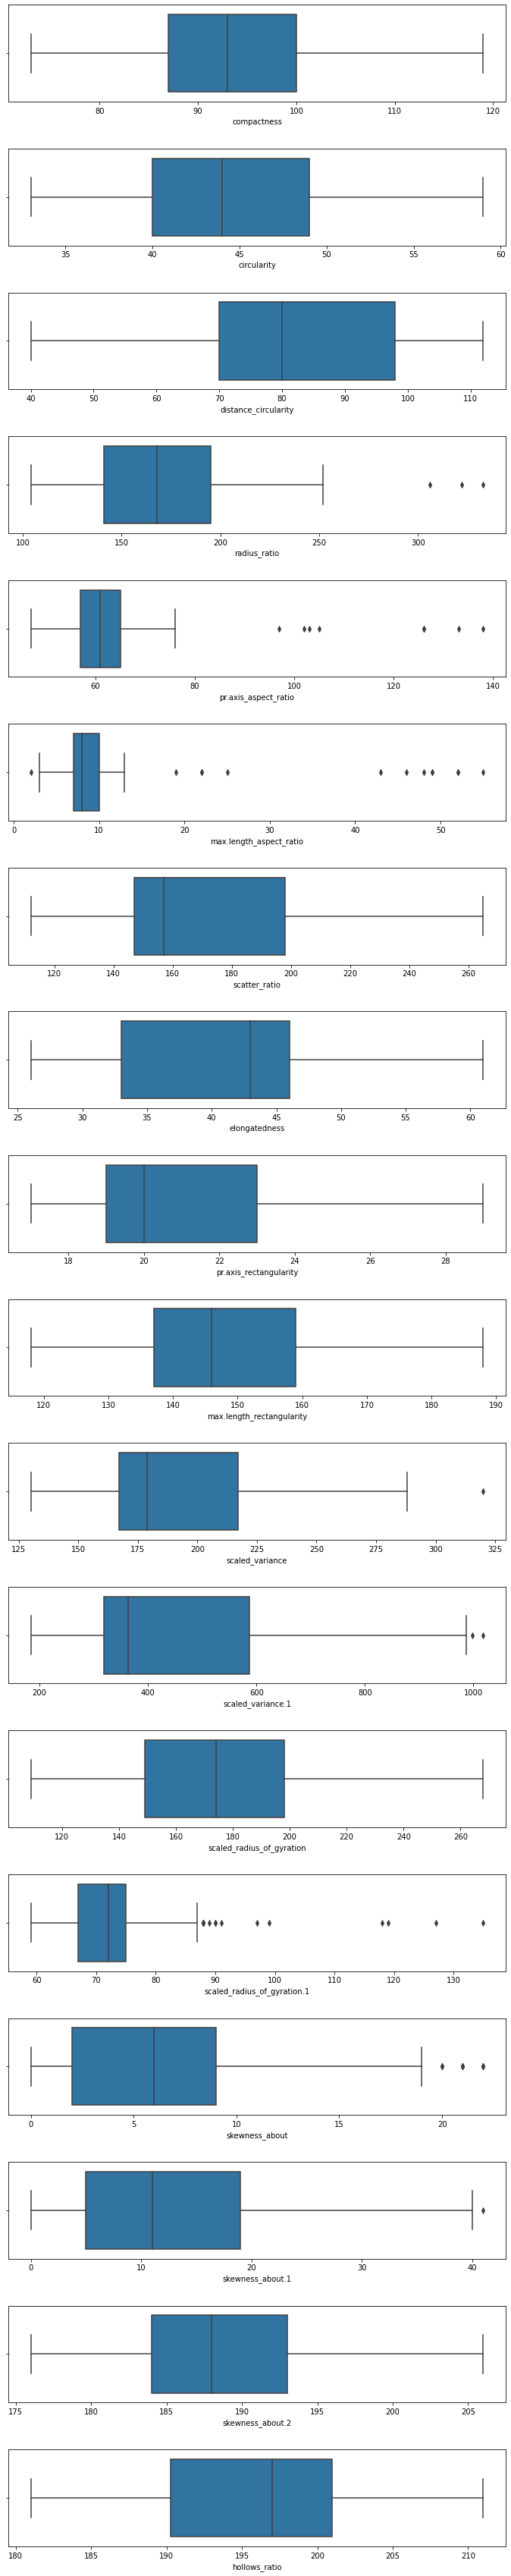

In [32]:
plt.figure(figsize= (10,50)) # To set the plot size.

plt.subplot(19,1,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.boxplot(x['compactness']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,2)
sns.boxplot(x['circularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,3)
sns.boxplot(x['distance_circularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,4)
sns.boxplot(x['radius_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,5)
sns.boxplot(x['pr.axis_aspect_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,6)       
sns.boxplot(x['max.length_aspect_ratio']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,7)
sns.boxplot(x['scatter_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,8)
sns.boxplot(x['elongatedness'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,9)
sns.boxplot(x['pr.axis_rectangularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,10)
sns.boxplot(x['max.length_rectangularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,11)        
sns.boxplot(x['scaled_variance'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,12)
sns.boxplot(x['scaled_variance.1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,13)
sns.boxplot(x['scaled_radius_of_gyration'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,14)
sns.boxplot(x['scaled_radius_of_gyration.1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,15)
sns.boxplot(x['skewness_about'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,16)
sns.boxplot(x['skewness_about.1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,17)       
sns.boxplot(x['skewness_about.2']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,18)
sns.boxplot(x['hollows_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 


##### Infernce on the above output:
Five point summary can be taken from the above displayed table and box plots for all the features.
For eg let us take attribute Compactness	:
 1. min - 73.
 2. 25% quartiles - 87.
 3. 50% quartiles(median) - 93.
 4. 75% quartiles - 100.
 5. max - 119. 
   
     similarly it can be done for all the other numerical vriables.
 
    From the above table we can infer central tendancy and measure of dispersion:
 For eg let us take Compactness age:
  1. Measure of central tendancy here is medain(50%) - 93.
  2. Measure of Dispersion:
     
     a. Range: Max-Min = 46.
     
     b. Inter Quartile Range: (75% quartiles) - (25% quartiles) = 13.
     
     c. Std Dev (Average distance/How far the data is distributed from the mean) - 8.2374.

#### The five point summary was also visualized using the boxplot where the left end and right end of the whiskers represnt the min and max values respectively, the box represent 25%, 50%(median) and 75% quartiles. 


#### e.Measure of skewness:
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. The presence of skewness also indicates the mix up of gaussians.

In [107]:
data.skew() #To determine the skewness value of all the features.

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

##### Inference on the above output:
1. The attributes with the skewness equal to zero have a distribution similar to Normal Distribution.
2. The attributes with the skewness greater than zero have its distribution shifted towards left and tailed in the right.
3. The attributes with the skewness less than zero have its distribution shifted towards right and tailed in the left.

#### f.Measure of Kurtosis:
 Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [108]:
data.kurtosis()

compactness                    -0.535275
circularity                    -0.922925
distance_circularity           -0.977287
radius_ratio                    0.304921
pr.axis_aspect_ratio           29.889135
max.length_aspect_ratio        58.375455
scatter_ratio                  -0.616570
elongatedness                  -0.866601
pr.axis_rectangularity         -0.390508
max.length_rectangularity      -0.770098
scaled_variance                 0.120071
scaled_variance.1              -0.203819
scaled_radius_of_gyration      -0.496336
scaled_radius_of_gyration.1    11.455759
skewness_about                  0.094077
skewness_about.1               -0.144728
skewness_about.2               -0.588758
hollows_ratio                  -0.813435
dtype: float64

##### Inference on the above output:
1. The attributes with Kurtosis value equalt to zero have no tails or no mix up of gaussians.
2. The attributes with Kurtosis value greater than indicates the tails are heavily tailed.
3. The attributes with Kurtosis value lesser than indicates the tails are lightly tailed.

===================================================================================================================

# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

# Data Preprocessing (Part- 1):

 Data Preprocessing involves:
 1. Data Imputation (shown in DP_Step:1).
 2. Outlier Detection and Cleaning Process (DP_Step:2).

#### DP_Step 1: Checking for the presence of null values:

In [5]:
data.isnull().values.any() #Checking the presence of null values.

True

In [6]:
data.isnull().sum() #Knowing the attributes that contain null values.

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
missingvalues = lambda x: x.fillna(np.median(x)) #Getting the median of the respective features.
data = data.apply(missingvalues,axis = 0) #Applying the medians in the missing. 
data.isnull().values.any() #Rechecking the applied process.

False

##### Inference on the above ouput:
1. It was found that there were missing values.
2. The missing values were replaced with the medians of their respective feature.
3. The missing values were not replaced with the mean because mean gets affected by the extreme values. 

===================================================================================================================

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

### Step:3 Exploratory Data Analytics:

### Univariate Analysis:

In [7]:
x = data.iloc[:,:18]  # Extracting the Predictors.
y = data['class']     # Extracting the class output. 
x_col = x.columns     # Fetching the names of the preictors.

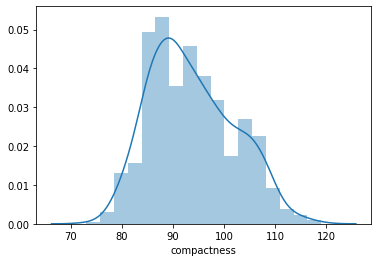

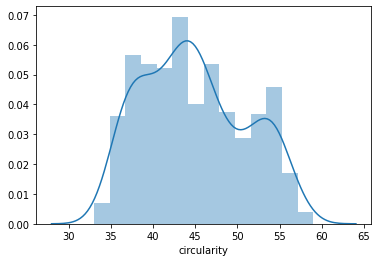

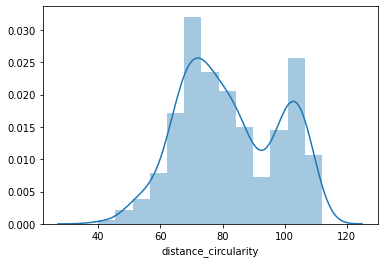

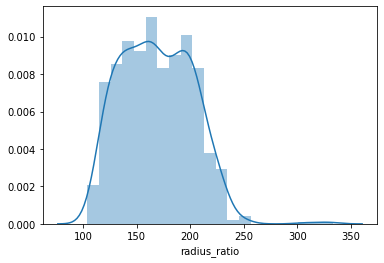

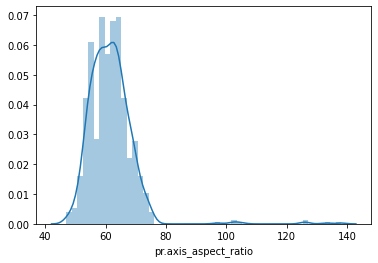

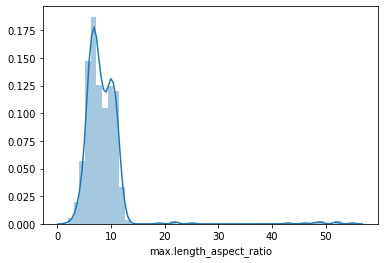

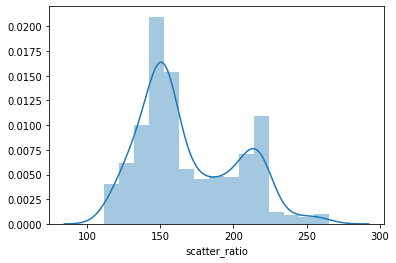

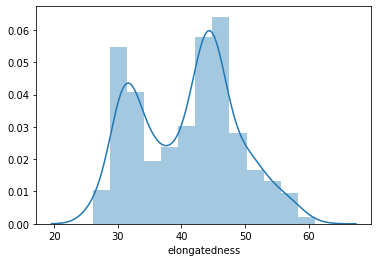

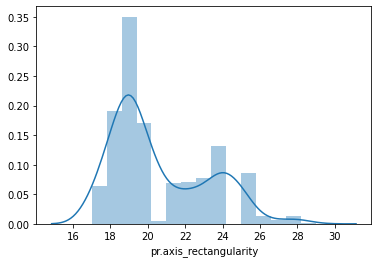

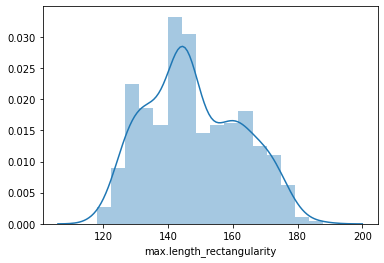

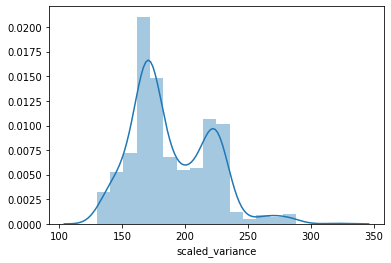

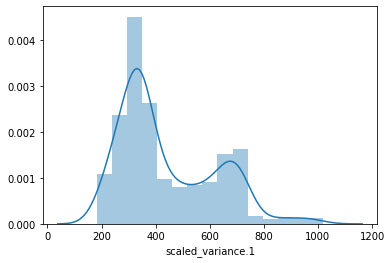

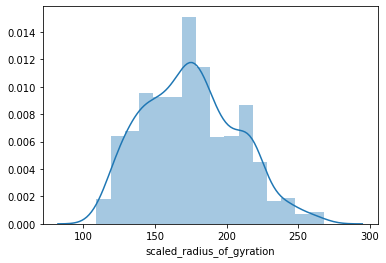

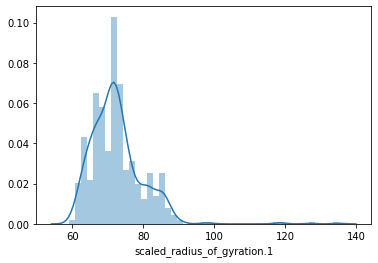

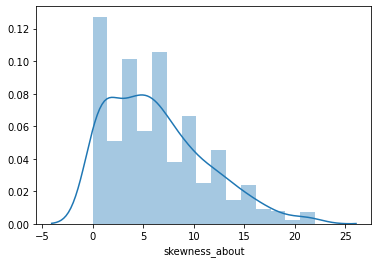

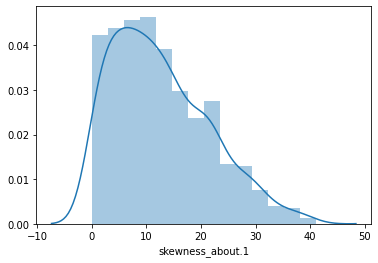

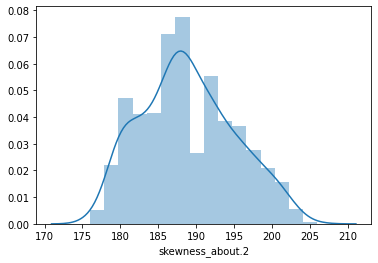

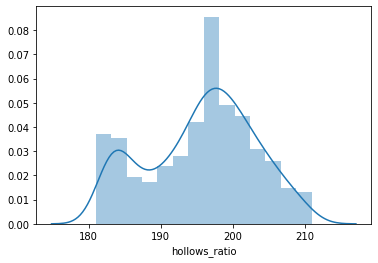

In [21]:
# Printing the distribution plot for the predictors:
for col in x_col:
    sns.distplot(data[col], hist_kws={"cumulative": False, "stacked": True, "label": ["0", "1", "2"]})
    plt.show()

#### Inference of the plots in the univariate analysis:

##### 1. Inference on the Compactness plot:
1. This attribute seems to be Right tailed.
2. There is only one peak with single mode. to 120
3. Most of the Compactness is between value .
4. The distribution is fairly symmetrical with right tail.
5. This also shows that attribute is lightly tailed leading to blunt peak.

##### 2. Inference on the Circularity plot:
1. The attribute seems to be right tailed.
2. The plot seems to be trimodal indicating the mix up of gaussians.
3. The distribution is also slightly unsymmetrical with the skewness value of 0.26.
4. The peak is highly blunt with very light tail indicated by the kurtosis value -0.922925.

##### 3. Inference on the distance_circularity plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.21)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 0.65).

##### 4.Inference on the radius_ratio plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.084946)
3. The distribution is right heavily tailed with sharp peak indicating more concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 12.030939).

##### 5.Inference on the pr.axis_aspect_ratio plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 2.649071)
3. The distribution is right heavily tailed with sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 10.869043).

##### 6. Inference on the max.length_aspect_ratio plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.360708)
3. The distribution is right heavily tailed with very sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 14.213798).

##### 7. Inference on the  scatter_ratio plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.073892)
3. The distribution is right heavily tailed with very sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 11.963922).

##### 8. Inference on the elongatedness  plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.362058)
3. The distribution is right heavily tailed with very sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 14.224762).

##### 9. Inference on the pr.axis_rectangularity  plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.666480)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value -  3.238308).

##### 10. Inference on the max.length_rectangularity plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.999389)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 5.128193).

##### 11. Inference on the scaled_variance plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value -  1.580576)
3. The distribution is right heavily tailed with blunt peak indicating moderate concentration of data in that peak value and data is largely ditributed across other values .(kurtosis value - 2.720152).

##### 12. Inference on the scaled_variance.1 plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.798697)
3. The distribution is right heavily tailed with sharp peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 3.874210).

##### 13. Inference on the scaled_radius_of_gyration plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 2.618047)
3. The distribution is right heavily tailed with sharp peak indicating more concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 11.163288).

##### 14. Inference on the scaled_radius_of_gyration.1 plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.580618)
3. The distribution is right heavily tailed with slightly blunt peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 2.720661).

##### 15. Inference on the skewness_about plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 4.220709)
3. The distribution is right very heavily tailed with very sharp peak indicating very high concentration of data in that peak value and data is very less ditributed across other values .(kurtosis value - 21.994974).

##### 16. Inference on the skewness_about.1 plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - -0.514317)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 0.616036).

##### 17. Inference on the skewness_about.2 plot:
1. No.of records with respect to class label 1 is 147.
2. No.of records with respect to class label 0 is 48.
3. Percentage difference between class labels 67.35%.

##### 18. Inference on the hollows_ratio plot:
1. The data is unimodal.
2. The data is lightly unsymmetrical with left skewed (skewness value - -0.143402 )
3. The distribution is left lightly tailed with blunt peak indicating data is ditributed across other values .(kurtosis value - -0.921781).



### Bivariate Analysis:

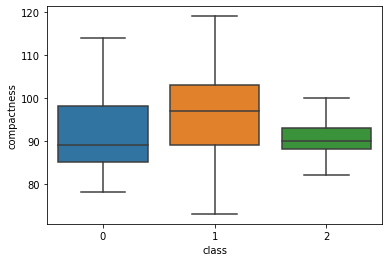

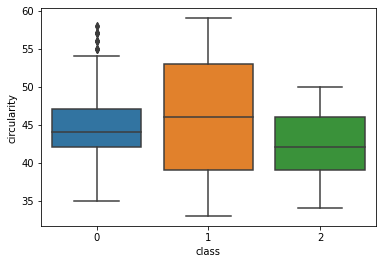

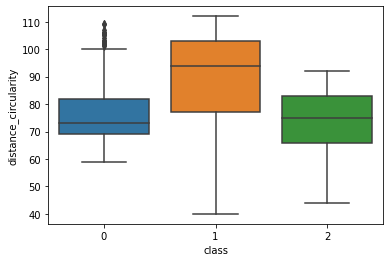

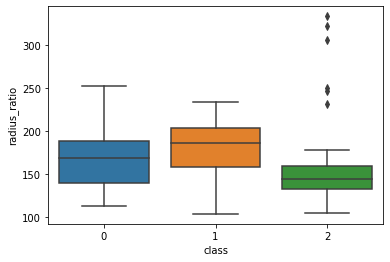

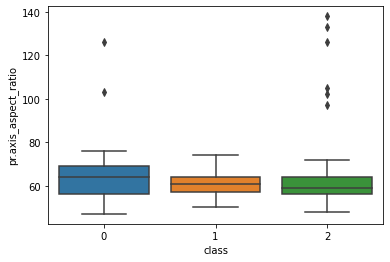

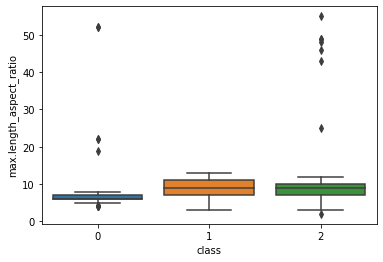

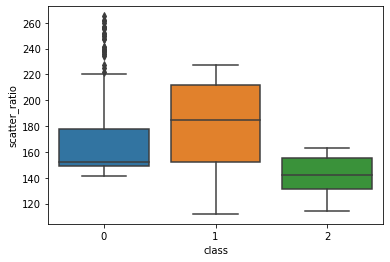

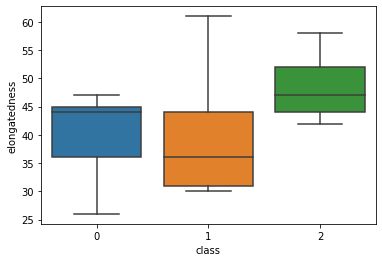

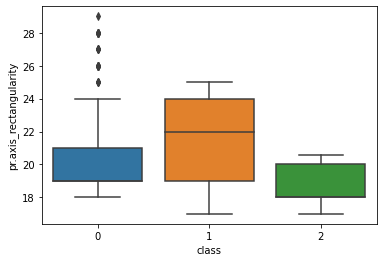

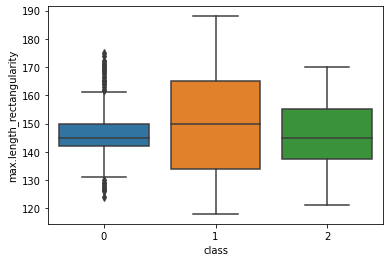

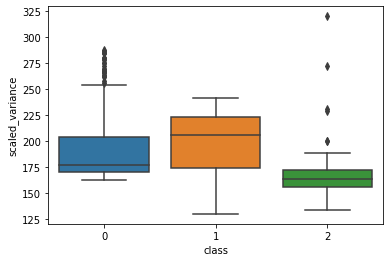

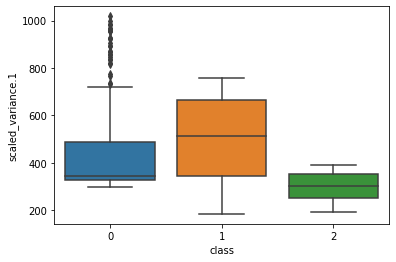

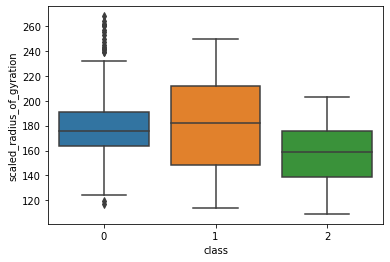

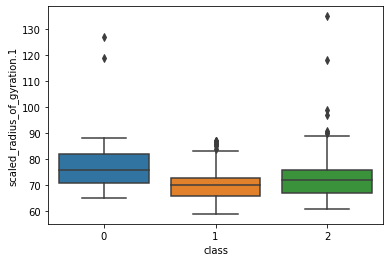

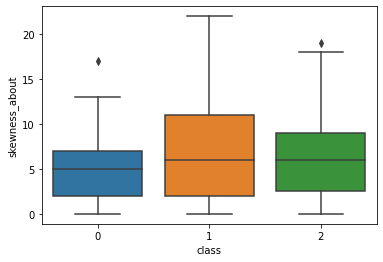

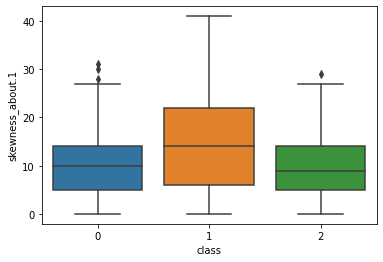

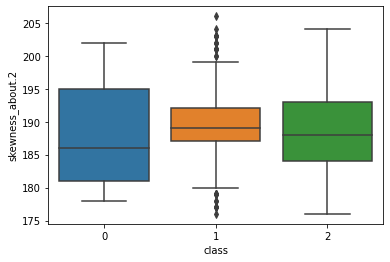

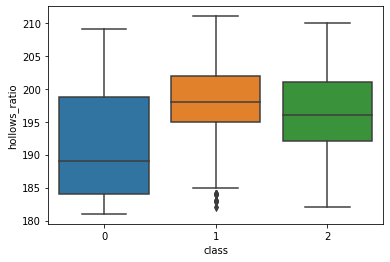

In [18]:
# Printing the boxplot to understand how each attribute infuence the target:
for col in x_col:
    sns.boxplot(y,x[col])
    plt.show()

##### 1. Inference on the Compactness vs class plot:
1. The Compactness value of Van are shorter in range compared to the bus and car.
2. The range of the bus is little less than the car but there is some overlap in the IQR of the bus and car compactness values.
3. This attribute gives slightly ditinguishing values between the different class.
4. Therefore, the attribute can contribute/add value for classification.

##### 2. Inference on the Circularity vs class plot:
1. The Ranges of circuarity parameter for all the three different classes seem to be distinguishable.
2. The IQR of the car have wide spread than van and bus.
3. This attribute gives slightly ditinguishing values between the different class.
4. Therefore, the attribute can contribute/add value for classification.

##### 3. Inference on the distance_circularity vs class plot:
1. The Ranges of distance_circularity parameter for all the three different classes seem to be distinguishable but there are some outliers in the bus, still they are near the whiskers only.
2. The IQR of the car have wide spread than van and bus.
3. This attribute gives slightly ditinguishing values between the different class.
4. Therefore, the attribute can contribute/add value for classification.

##### 4. Inference on the radius_ratio vs  class plot:
1. The Ranges of radius_ratio parameter for all the three different classes seem to be distinguishable but there are some outliers in the vanwhich can be taken care during the outlier treatment .
2. The IQR of the bus have wide spread than van and car, there is high overlap of the values between the class.
3. Car and bus have radius_ratio values similar to the van but there are some outliers in the higher values for van. 
3. This attribute gives very less ditinguishing values between the different class.
4. Therefore, the attribute can contribute/add lesser value for classification.

##### 5. Inference on the pr.axis_aspect_ratio vs  class plot:
1. The Ranges of radius_ratio parameter for all the three different classes seem to be distinguishable but there are some outliers in the vanwhich can be taken care during the outlier treatment .
2. The IQR of the bus have wide spread than van and car, there is high overlap of the values between the class.
3. Car and bus have radius_ratio values similar to the van but there are some outliers in the higher values for van. 
3. This attribute gives very less ditinguishing values between the different class.
4. Therefore, the attribute can contribute/add lesser value for classification.

##### 6. Inference on the max.length_aspect_ratio vs  class plot:
1. The Ranges of max.length_aspect_ratio parameter for bus is smaller than the car and van, car and van seem to have same minimum range but maxmum value for van is less than the car. 
2. The IQR of the bus have very small spread than van and car, there is high overlap of the values between the car and van.
3. There are also outliers for bus and van in the higher values of this attribute. 
3. This attribute gives very less ditinguishing values between the different class.
4. Therefore, the attribute can contribute/add lesser value for classification.

##### 7. Inference on the scatter_ratio  vs   class plot:
1. This attribute gives much distinguishing Ranges between the classes.
2. The IQR of the bus and Car have some amount of overlap.
3. There are very high number of outliers only in the bus may be due to mix up of Gaussians.
4. Overall the attribute seems to have distinguishing character between the class.
5. This attribute may cotribute for classfication.

##### 8. Inference on the elongatedness  vs  class plot:
1. The Ranges of the van is smaller but within the range of the car which is having very wide range, the range of the bus are in the smaller values.
2. The IQR of the bus and car seem to be overlaped but the distributions have different skewness making some difference between them.
3. The attribute seems to have distinguishable capablity between the classes.

##### 9. Inference on the pr.axis_rectangularity vs  class plot:
1. The Range of car and van have the same min values but different maximum values.
2. The Ranges of all the three class are different but they overlap with each other.
3. The IQRs of car have very wide spread copared to other class.
4. The attribute does not make much distinguishing factor between the classes.

##### 10. Inference on the max.length_rectangularity vs  class plot:
1. The range of he car is across the range of the  max.length_rectangularity, The range of the class well overlap
2. The IQRs also have very high overlap but the IQR of car is widely spread compared to other class.
3. There are many outliers close to the whiskers of the bus.
4. The attribute give very less dstinguishable aspects between the classes.

##### 11. Inference on the scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about,  skewness_about.1, skewness_about.2   vs  class plot:
1. All these attributes have ovrlapping ranges and IQR.
2. Unable to find the distinguishable caharacteristics.
3. There are also few outliers.
4. These attributes seem to give very less distinguishable characteristics among the classes.

### Multivariate Analysis:

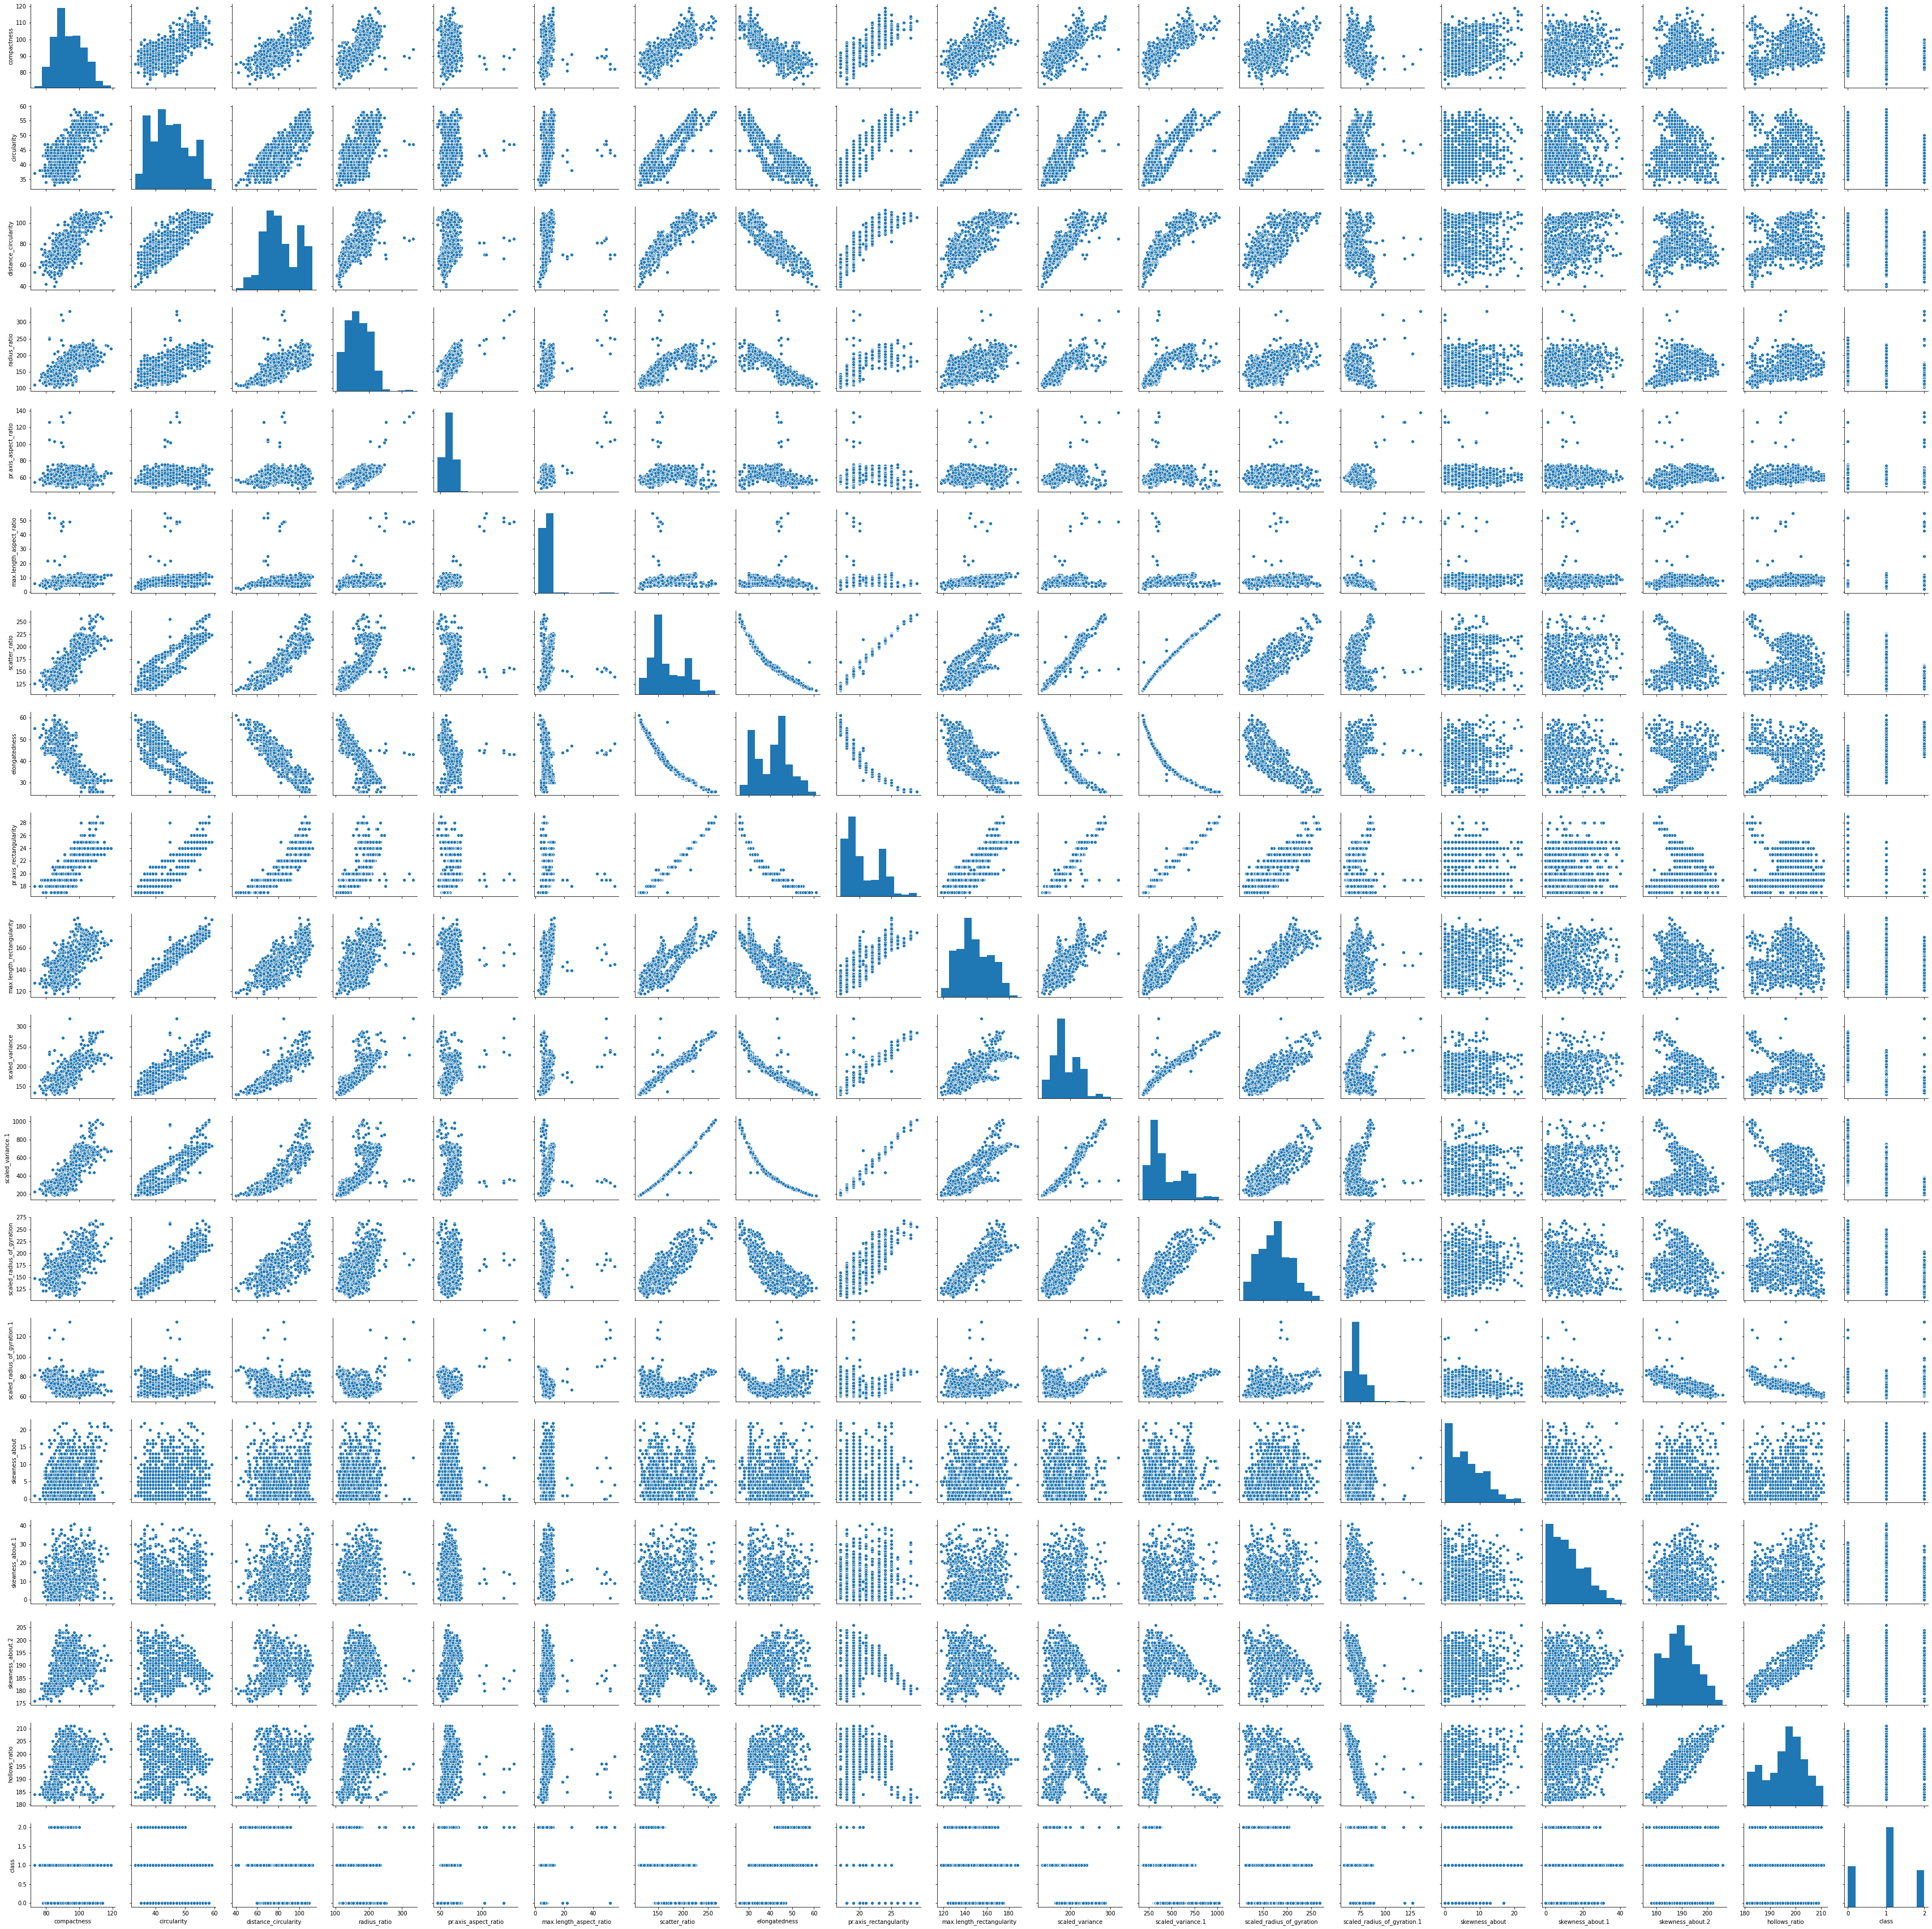

In [29]:
sns.pairplot(data) #Paitplot for all the columns is displayed using pairplot function from seaborn package. 

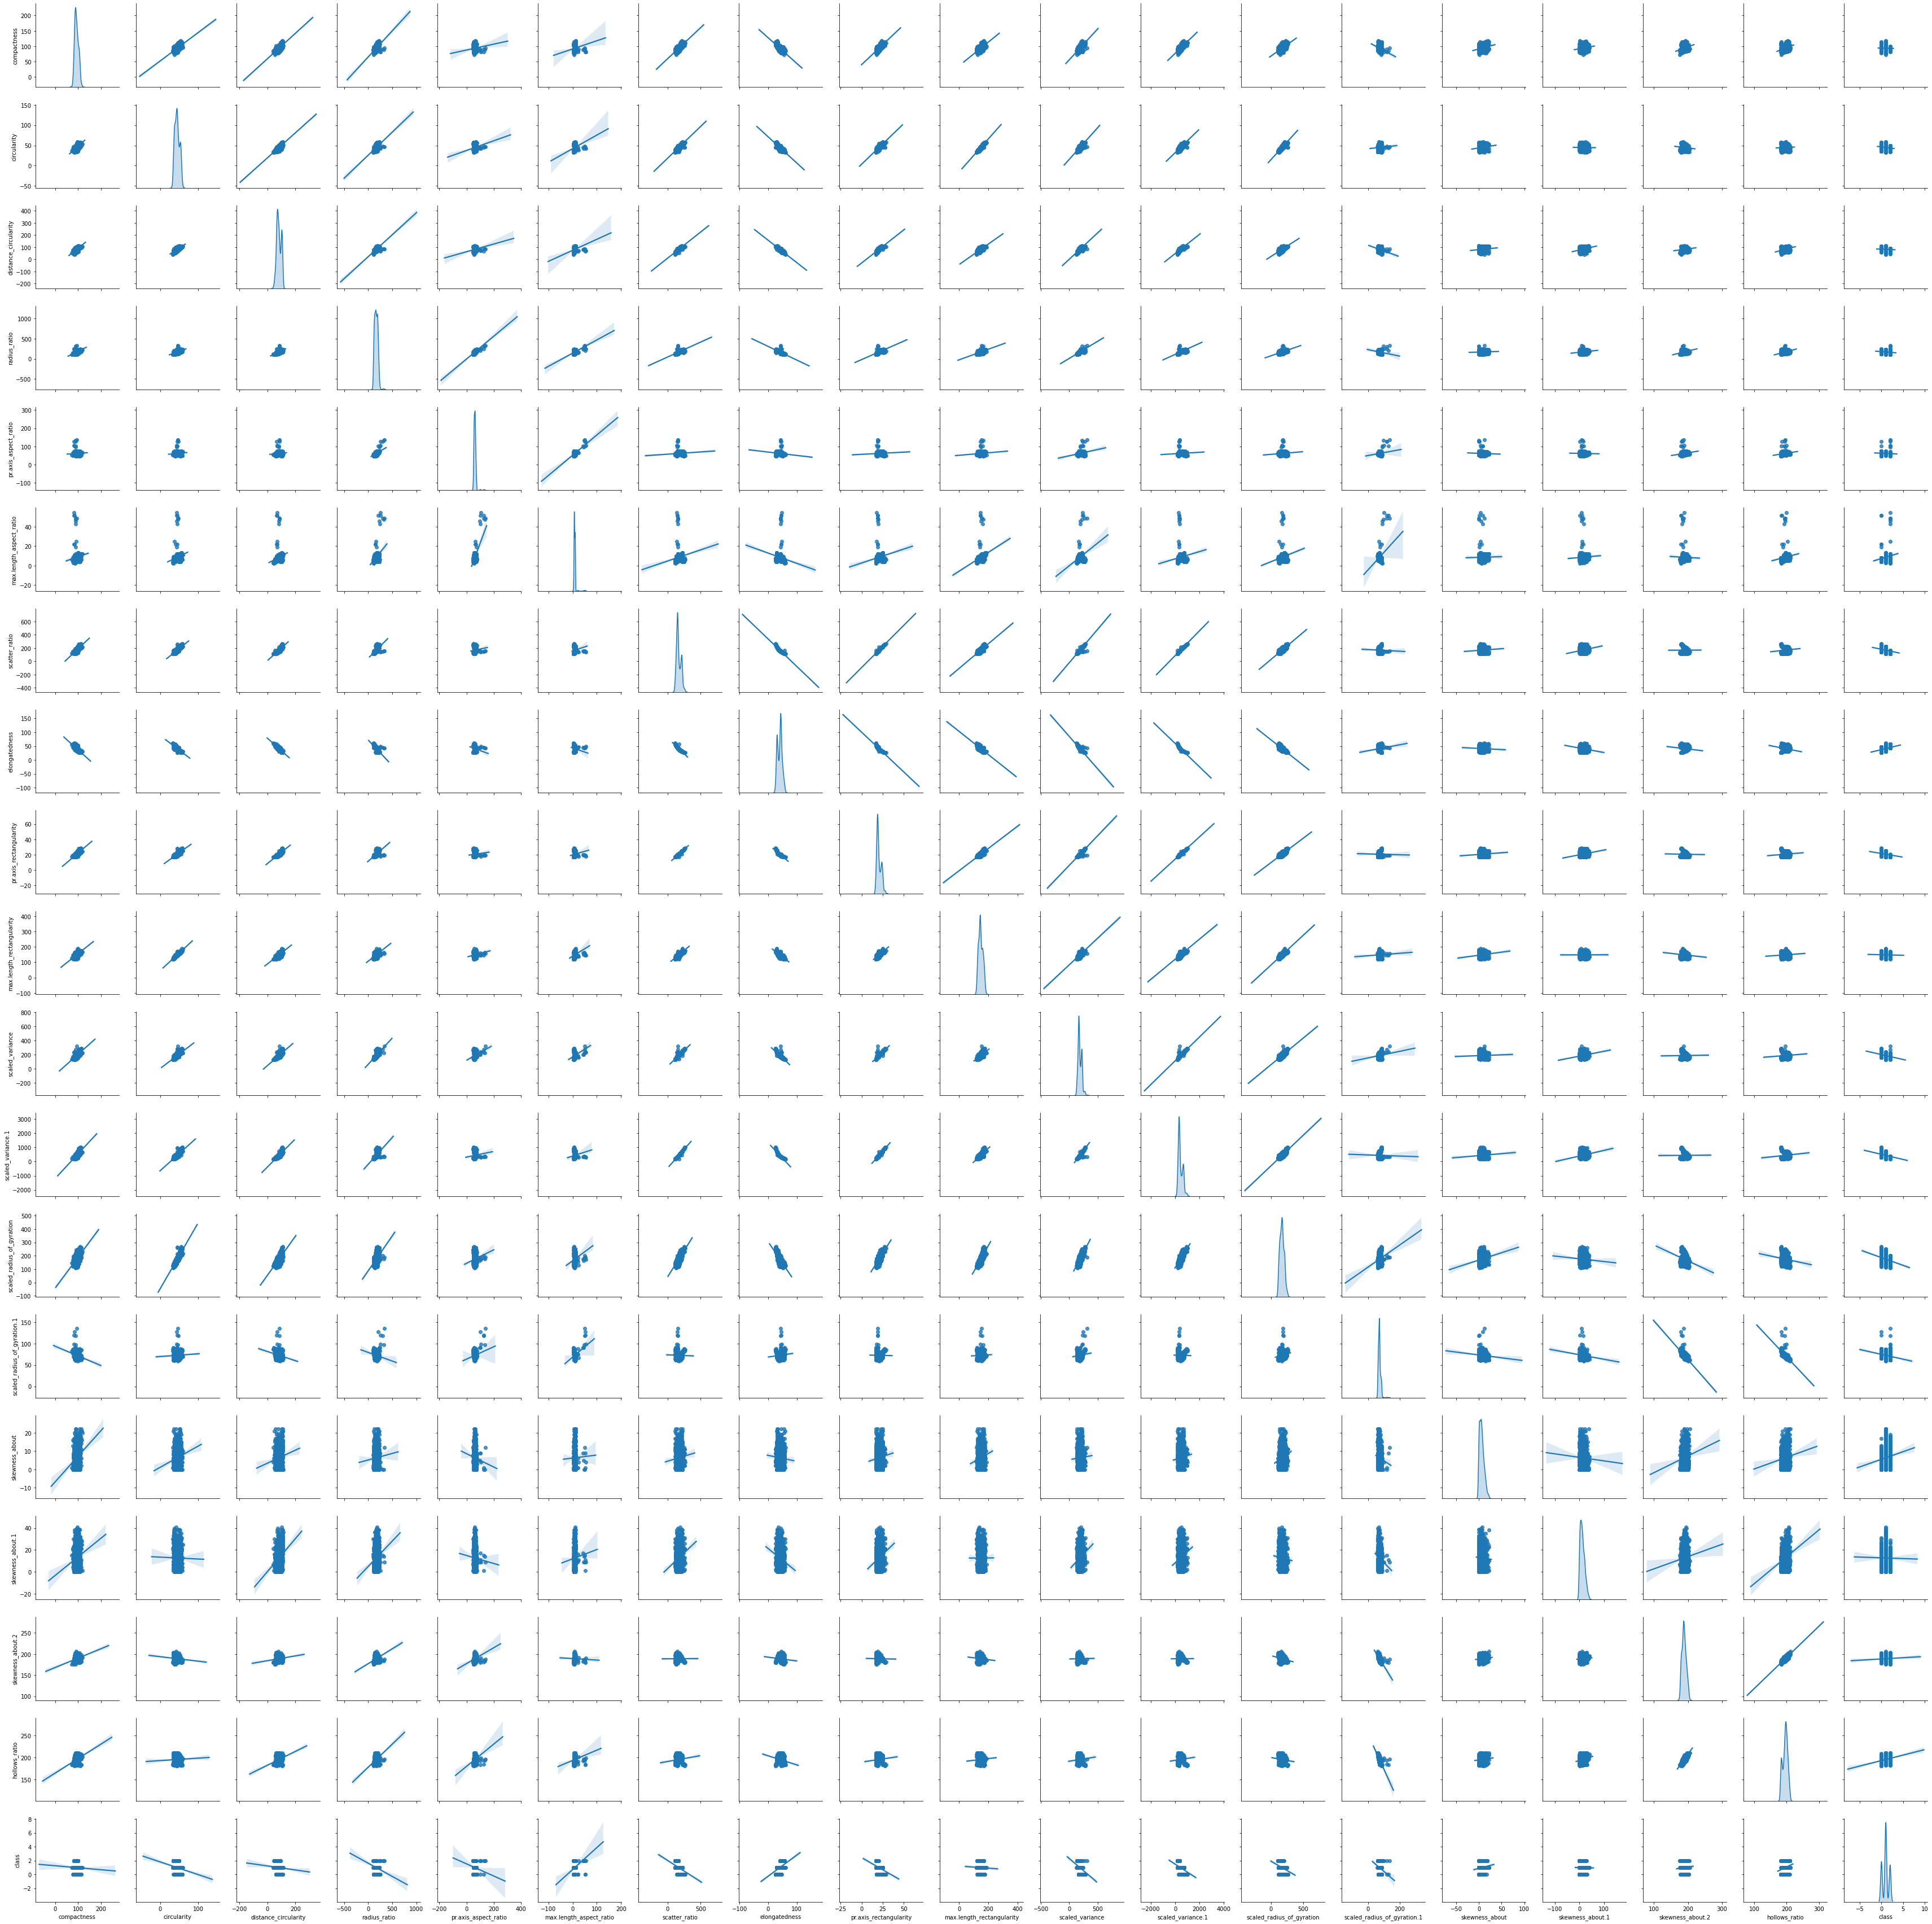

In [30]:
sns.pairplot(data, kind='reg',diag_kind = 'kde')  #Paitplot for all the columns is displayed using pairplot function from seaborn package.

##### Inference on the above outputs:
1. Attributes like radius_ratio, pr.axis_aspect_ratio, scatter_ratio, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1 have negative trends with the class but distinguishing characteristics are also very less.

2. Attributes like max.length_aspect_ratio, elongatedness have positive trend with the class but distinguishing characteristics are also very less.

3. The other attributes have neutral trend and less distinguishable character.

4. There are less attributes that gives distinguishable characteristics. A clear decision on important attributes that is contibuting for classification is not possible to take. 

#### Correlation heatmap:
##### Note: 
 Below a Correlation heat map is used here to get the idea on the attributes that are correlated to each other, so that the attributes that are highly correlated can be obtained and trails on improving the accuracy of the model by doing some feature engineering on those correlated features. 

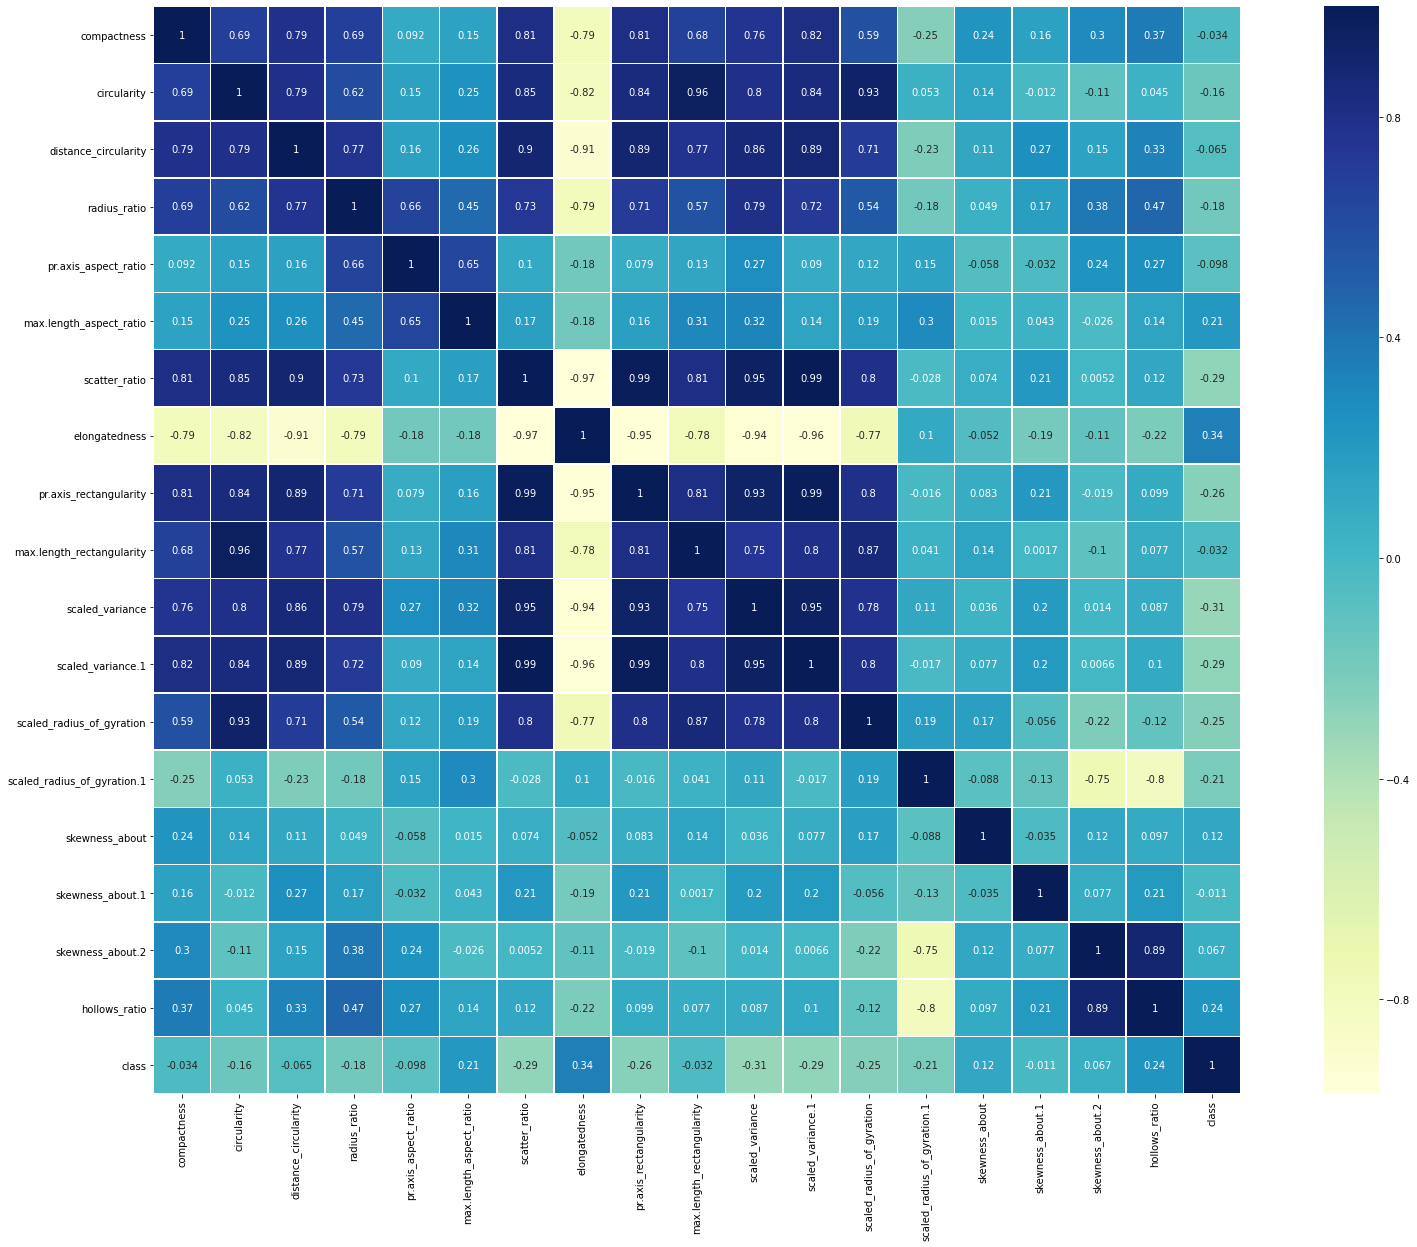

In [31]:
corr=data.corr() #This function gives the correlation between the features.
plt.subplots(figsize =(30, 20))# Here subplot function is used to give the shape of the each box in the heatmap.
sns.heatmap(corr, linewidths=.5, square=True,cmap="YlGnBu",annot=True) #Using this function we can have the visualization of the correlation between the features.

##### Inference on the above outputs:
1. Attributes like 'scaled_variance.1', 'scatter_ratio', 'scaled_variance', 'circularity', 'radius_ratio', 'pr.axis_rectangularity','distance_circularity', 'elongatedness' and 'max.length_rectangularity' seem to be mostly in very high correlation with other features.

2. Either by doing Feature Elemination or Feature Engineering on the above attributes in further steps trial on model performance improvemt on validation data can be made

===================================================================================================================

# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

# Data Preprocessing (Part- 2):

 Data Preprocessing involves:
 1. Data Imputation (shown above in DP_Step:1).
 2. Outlier Detection and Cleaning Process (DP_Step:2).

#### DP_Step 2: Outlier Detection and Elemination:
  Outliers can be detected in the following methods:
  
  1. Visualization Techniques:
       
       a. Box Plot.
       
       b. Scatter Plot.
       
       
  2. Non - Visualization Techniques:
      
      a. Z-score
      
      b. IQR.

Outlier elemination methods:
 
  1. Z-Score.
  2. IQR

#### a.: Outlier Detection:

Here Outlier is detected using Boxlot visual representation:

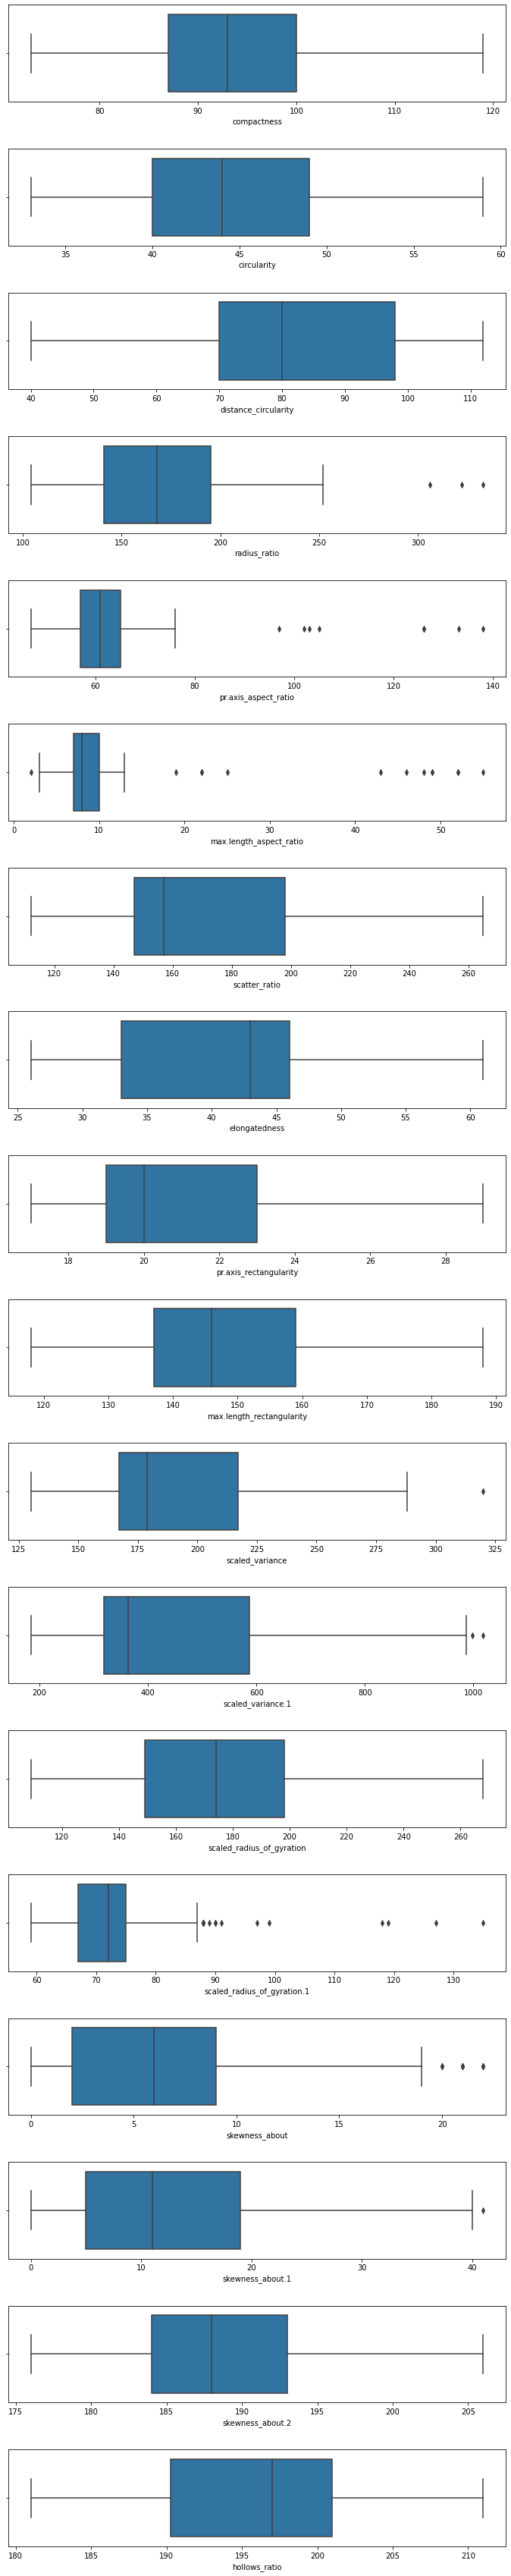

In [32]:
plt.figure(figsize= (10,50)) # To set the plot size.

plt.subplot(19,1,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.boxplot(x['compactness']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,2)
sns.boxplot(x['circularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,3)
sns.boxplot(x['distance_circularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,4)
sns.boxplot(x['radius_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,5)
sns.boxplot(x['pr.axis_aspect_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,6)       
sns.boxplot(x['max.length_aspect_ratio']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,7)
sns.boxplot(x['scatter_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,8)
sns.boxplot(x['elongatedness'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,9)
sns.boxplot(x['pr.axis_rectangularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,10)
sns.boxplot(x['max.length_rectangularity'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,11)        
sns.boxplot(x['scaled_variance'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,12)
sns.boxplot(x['scaled_variance.1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,13)
sns.boxplot(x['scaled_radius_of_gyration'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,14)
sns.boxplot(x['scaled_radius_of_gyration.1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,15)
sns.boxplot(x['skewness_about'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,16)
sns.boxplot(x['skewness_about.1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,17)       
sns.boxplot(x['skewness_about.2']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(19,1,18)
sns.boxplot(x['hollows_ratio'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 


##### Inference on the above output:
1. It can be seen that form above plot there are many features with outliers.
2. The outliers here are assumed that they are because of random occurence and mixing up of gaussians.

      Therefore the outliers are removed for futher process with the risk of lossing information, no steps like replacing the outliers with the median or to the whiskers or retaining them as such are not taken.


#### b.: Outlier elemination:

Here IQR method is used to remove the outliers.

In [11]:
# Claculating the Quantiles for the attributes:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# Calculating the IQR:
IQR = Q3-Q1

# Obtaining the data without qoutliers:
data_1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

data_1.shape

(813, 19)

#####  Inference on the above output:
1. Outliers were detected using visual techniques.
2. Outliers were removed uing IQR technique and the no.of observations is reduced from 846 to 813 records with 19 predictors.

==================================================================================================================

# 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

# Data Splitting:

#### Step 1: Seperating the data into Predictors and Labels:
1. x_1 is for predictors.
2. y_1 is label with class output.

In [12]:
x_1 = data_1.iloc[:,:18] #Extracting the predictors.
y_1 = data_1['class']    #Extracting the dependent variable.
x_1_col = x_1.columns    #  Extracting the column names.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.3,stratify = y_1, random_state=2) # Splitting the data Cross Validation and x_test, y_test will be used for production.

##### Inference on the above steps:
  The data is seperated into label and feature and again split into train and test samples with 70:30 proportions respectively, so now we can train and test the model. 

#### Step 3: Nullifying the effect of different units of attributes:

There are few features with large scale which may suppress the other features so they need to be Normalized or scaled. Any data with attributes of different scales can be standardized using following methods:

        1. MinMaxScaler  - makes use of mininmum and maximum values of the data and gets affected by outlier but maintains the shape of the data. It gives Range from 0 to 1.
        
        2. StandardScaler - makes use of the mean and standard deviation of the data and aslo gets affectsd by outlier with implication of scaling. It dose not maintain the exact shape of the data.
        
        3. Robustscaler -Makes use of min and IQR of the data, it gives very high loss of data so it does not gets affected by outliers also does not maintain the shape of the data.
        
        With among three types, standard scaler is used for our analysis and model building purposes becuse of the advantage of normalizing the data along with implication of scling also among other two its range is much acceptable. 
    

In [14]:
scale = StandardScaler()  # in built normalizing function availble in sklearn. 

x_train_sc = pd.DataFrame(scale.fit_transform(x_train)) #Normalizing the training features.
x_train_sc.columns = x_1_col                            #Assigning the normalized training features with the original data's feature name. 

x_test_sc = pd.DataFrame(scale.fit_transform(x_test)) #Normalizing the test features.
x_test_sc.columns = x_1_col                           #Assigning the normalized testing features with the original data's feature name.

###### Visualizing the effect of Normalization:

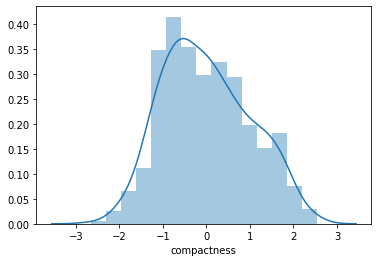

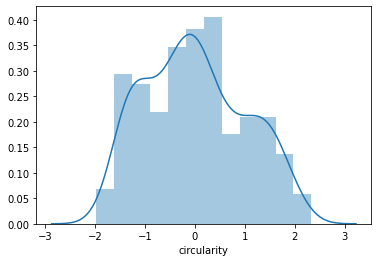

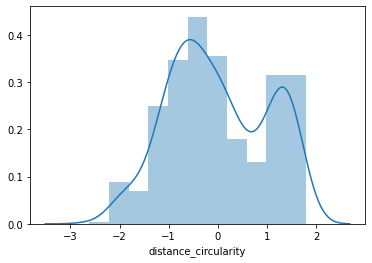

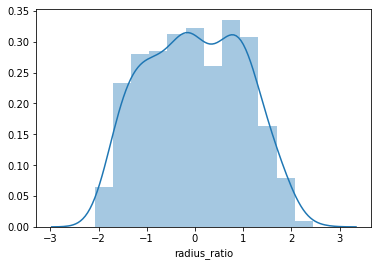

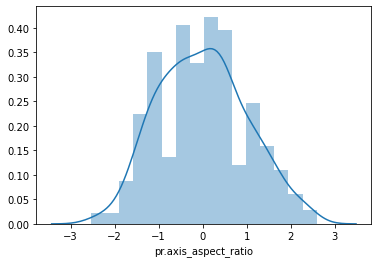

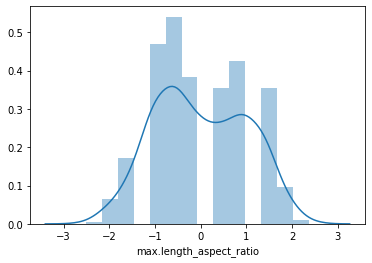

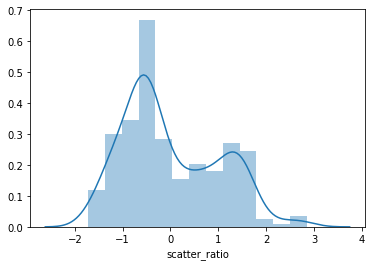

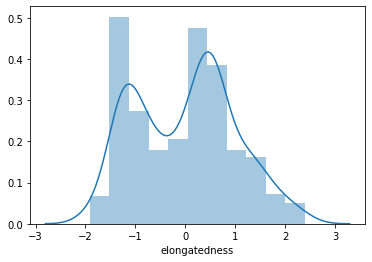

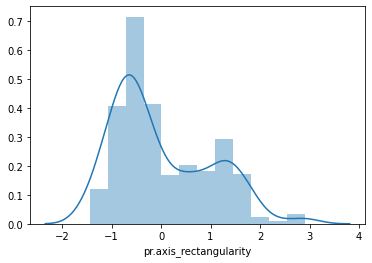

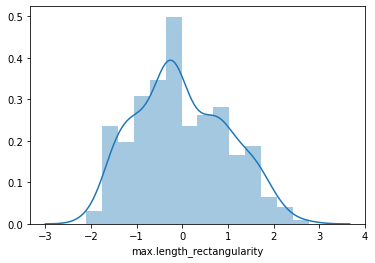

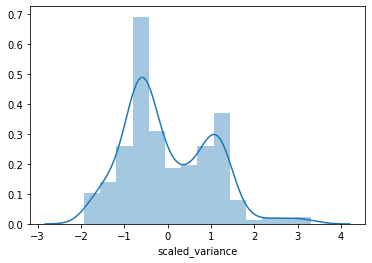

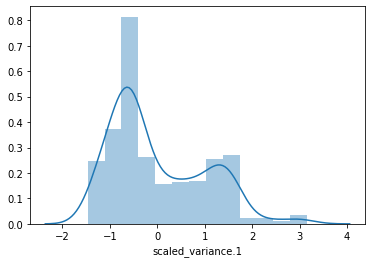

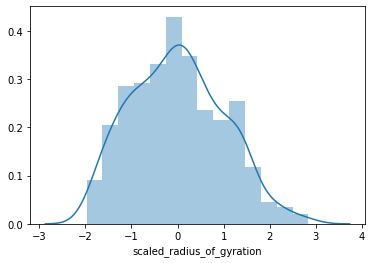

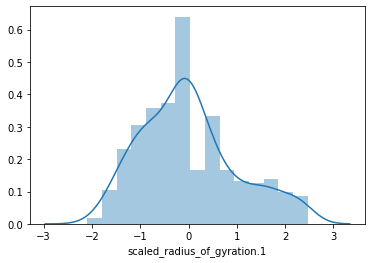

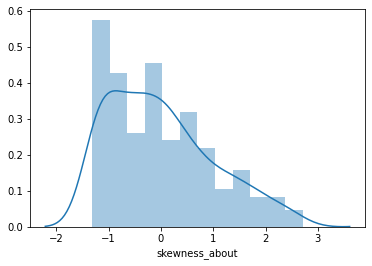

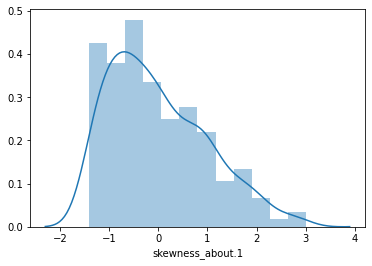

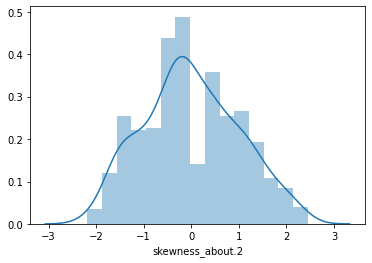

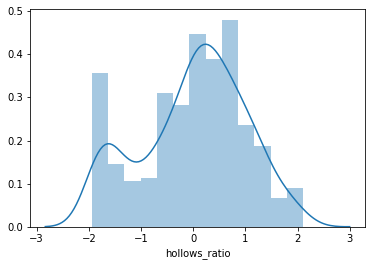

In [38]:
x_train_sc_col = x_train_sc.columns
for col in x_train_sc_col:
    sns.distplot(x_train_sc[col])
    plt.show()

##### Inference on the outputs:
      Therefore the effect of different attributes are removed by normalizing the all attributes. Which is also evident in the above plots.

==================================================================================================================

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

# 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

# 5. Perform K-fold cross validation and get the cross validation score of the model (optional)

# Building Classification model using different algorithms:

### Model Buiding Iteration 1:

#### Multicollinearity  Check:
1. In the above correlation it was found that attributes 'scaled_variance.1', 'scatter_ratio', 'scaled_variance', 'circularity', 'radius_ratio', 'pr.axis_rectangularity','distance_circularity' and 'max.length_rectangularity' were in high correlation.

2. To have the confirmation on the inference a muticollinearity check is made below to do Feature Elemination.

3. The Multicollinearity check is done using known Value Inflation Factor method.

##### Iterations 1:

In [55]:
vif = pd.DataFrame() #Creating Value Inflation Factor DataFrame.
x_train1 = x_train_sc
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])] #Using VIF function from scipy.stats
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) #Sorting vslues in the descending order. 
vif

Features     VIF
11            scaled_variance.1  188.75
6                 scatter_ratio  183.72
8        pr.axis_rectangularity   78.70
10              scaled_variance   49.76
7                 elongatedness   39.15
1                   circularity   37.94
3                  radius_ratio   27.40
9     max.length_rectangularity   23.40
17                hollows_ratio   18.85
16             skewness_about.2   15.42
2          distance_circularity   13.89
12    scaled_radius_of_gyration   11.46
13  scaled_radius_of_gyration.1   10.97
4          pr.axis_aspect_ratio    6.78
5       max.length_aspect_ratio    5.69
0                   compactness    5.26
15             skewness_about.1    1.60
14               skewness_about    1.31

##### Iterations 2:

In [56]:
x_train2 = x_train1.drop(['scaled_variance.1'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train2.columns
vif['VIF'] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6                 scatter_ratio  103.39
8        pr.axis_rectangularity   57.38
10              scaled_variance   44.51
1                   circularity   37.48
7                 elongatedness   33.92
3                  radius_ratio   27.40
9     max.length_rectangularity   23.32
16                hollows_ratio   18.62
15             skewness_about.2   15.36
2          distance_circularity   13.89
11    scaled_radius_of_gyration   11.41
12  scaled_radius_of_gyration.1   10.81
4          pr.axis_aspect_ratio    6.78
5       max.length_aspect_ratio    5.51
0                   compactness    5.24
14             skewness_about.1    1.58
13               skewness_about    1.31

##### Iterations 3:

In [57]:
x_train3 = x_train2.drop(['scatter_ratio'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train3.columns
vif['VIF'] = [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9               scaled_variance  42.05
1                   circularity  37.18
7        pr.axis_rectangularity  28.33
6                 elongatedness  27.48
3                  radius_ratio  26.98
8     max.length_rectangularity  23.32
15                hollows_ratio  18.59
14             skewness_about.2  15.09
2          distance_circularity  13.87
10    scaled_radius_of_gyration  11.32
11  scaled_radius_of_gyration.1  10.81
4          pr.axis_aspect_ratio   6.69
5       max.length_aspect_ratio   5.51
0                   compactness   5.20
13             skewness_about.1   1.56
12               skewness_about   1.30

##### Iterations 4:

In [58]:
x_train4 = x_train3.drop(['scaled_variance'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train4.columns
vif['VIF'] = [variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                   circularity  36.06
3                  radius_ratio  24.87
7        pr.axis_rectangularity  23.93
8     max.length_rectangularity  23.30
6                 elongatedness  22.28
14                hollows_ratio  17.79
13             skewness_about.2  14.41
2          distance_circularity  12.71
10  scaled_radius_of_gyration.1  10.53
9     scaled_radius_of_gyration  10.14
4          pr.axis_aspect_ratio   6.22
5       max.length_aspect_ratio   5.34
0                   compactness   5.09
12             skewness_about.1   1.54
11               skewness_about   1.21

##### Iterations 5:

In [59]:
x_train5 = x_train4.drop(['circularity'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train5.columns
vif['VIF'] = [variance_inflation_factor(x_train5.values, i) for i in range(x_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                  radius_ratio  24.29
6        pr.axis_rectangularity  23.90
5                 elongatedness  22.20
13                hollows_ratio  17.77
12             skewness_about.2  14.27
1          distance_circularity  12.71
9   scaled_radius_of_gyration.1  10.34
7     max.length_rectangularity   8.41
8     scaled_radius_of_gyration   6.91
3          pr.axis_aspect_ratio   6.20
4       max.length_aspect_ratio   5.18
0                   compactness   5.08
11             skewness_about.1   1.52
10               skewness_about   1.21

##### Iterations 6:

In [60]:
x_train6 = x_train5.drop(['radius_ratio'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train6.columns
vif['VIF'] = [variance_inflation_factor(x_train6.values, i) for i in range(x_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5        pr.axis_rectangularity  21.77
4                 elongatedness  19.92
12                hollows_ratio  17.65
11             skewness_about.2  14.23
1          distance_circularity  12.41
8   scaled_radius_of_gyration.1   9.13
6     max.length_rectangularity   8.11
7     scaled_radius_of_gyration   6.90
3       max.length_aspect_ratio   5.18
0                   compactness   4.79
2          pr.axis_aspect_ratio   1.58
10             skewness_about.1   1.52
9                skewness_about   1.20

##### Iterations 7:

In [61]:
x_train7 = x_train6.drop(['pr.axis_rectangularity'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train7.columns
vif['VIF'] = [variance_inflation_factor(x_train7.values, i) for i in range(x_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11                hollows_ratio  17.62
10             skewness_about.2  13.53
1          distance_circularity  12.02
4                 elongatedness  10.93
7   scaled_radius_of_gyration.1   9.13
5     max.length_rectangularity   7.72
6     scaled_radius_of_gyration   6.90
3       max.length_aspect_ratio   4.94
0                   compactness   3.92
2          pr.axis_aspect_ratio   1.51
9              skewness_about.1   1.46
8                skewness_about   1.20

##### Iterations 8:

In [84]:
x_train8 = x_train7.drop(['hollows_ratio'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train8.columns
vif['VIF'] = [variance_inflation_factor(x_train8.values, i) for i in range(x_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1          distance_circularity  12.02
4                 elongatedness  10.89
5     max.length_rectangularity   7.71
7   scaled_radius_of_gyration.1   7.39
10             skewness_about.2   7.06
6     scaled_radius_of_gyration   6.89
0                   compactness   3.88
3       max.length_aspect_ratio   3.71
2          pr.axis_aspect_ratio   1.45
9              skewness_about.1   1.28
8                skewness_about   1.20

##### Iterations 9:

In [85]:
x_train9 = x_train8.drop(['distance_circularity'],axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train9.columns
vif['VIF'] = [variance_inflation_factor(x_train9.values, i) for i in range(x_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4    max.length_rectangularity  7.71
5    scaled_radius_of_gyration  6.78
9             skewness_about.2  6.43
6  scaled_radius_of_gyration.1  6.18
3                elongatedness  5.27
0                  compactness  3.77
2      max.length_aspect_ratio  3.44
1         pr.axis_aspect_ratio  1.44
7               skewness_about  1.19
8             skewness_about.1  1.19

##### Inference on the above output:
1. In the above iterations it was forund that along with these attributes 'scaled_variance.1', 'scatter_ratio', 'scaled_variance', 'circularity', 'radius_ratio', 'pr.axis_rectangularity','distance_circularity' and 'max.length_rectangularity' other attributes also had but high inflation factor but upon cross checking with correlation matrix those variables did not have very high correlation.

2. Threfore only features ('scaled_variance.1', 'scatter_ratio', 'scaled_variance', 'circularity', 'radius_ratio', 'pr.axis_rectangularity','distance_circularity' and 'max.length_rectangularity') were eleminated for the following steps.

3. Model's performace was checked by dropping features mentioned in the second point along with other features in the multicollinearity check, the model's performace drastically reduced but those trials are not shown here. 


#### Dropping the features that were determined to have less predictive capacity in training and test data:

In [15]:
x_train_1 = x_train_sc.drop(['scaled_variance.1', 'scatter_ratio', 'scaled_variance', 'circularity', 'radius_ratio', 'pr.axis_rectangularity','distance_circularity','max.length_rectangularity'],axis = 1)

In [16]:
x_test_1 = x_test_sc.drop(['scaled_variance.1','scatter_ratio','scaled_variance','circularity', 'radius_ratio','pr.axis_rectangularity','distance_circularity','max.length_rectangularity'], axis = 1)
x_test_1 

compactness  pr.axis_aspect_ratio  max.length_aspect_ratio  \
0       1.094669             -0.871889                 0.948866   
1      -0.926109             -0.690524                -2.492033   
2      -0.094024              0.941759                -0.525805   
3      -0.569501              0.216300                -0.034248   
4      -0.688370              0.034935                -0.525805   
..           ...                   ...                      ...   
239    -1.401586             -1.415984                -1.017362   
240     1.451277             -0.690524                 1.440423   
241    -0.331762             -0.327795                 1.440423   
242     0.619192             -1.597348                -0.034248   
243    -1.639324              0.216300                -0.034248   

     elongatedness  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0        -1.338736                   1.420733                    -0.054598   
1         2.495303                  -1.391133                     2.156681   
2         0.194879                  -1.303262                    -0.370495   
3         0.833886                  -1.479004                    -1.476135   
4         0.578283                  -0.981069                    -0.528443   
..             ...                        ...                          ...   
239       0.450482                   0.102671                     2.156681   
240      -1.338736                   1.274282                    -0.212546   
241       0.194879                   0.307703                     0.577196   
242       1.472892                  -1.244682                     0.261299   
243       0.322681                  -0.014490                     0.893093   

     skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  
0         -0.252301          0.550013         -0.392303       0.100991  
1          1.327767          1.019913         -1.192762      -1.585032  
2         -0.478025          1.372338          0.087972      -0.028703  
3         -0.703749         -0.742212          2.009073       1.787015  
4         -1.155197         -1.212112          0.568247       0.490074  
..              ...               ...               ...            ...  
239       -0.478025         -0.859687         -1.512945      -1.585032  
240       -1.380921          0.315063         -0.392303       0.230685  
241        0.876319         -0.154837         -0.872578      -0.417785  
242       -1.380921          0.080113         -0.392303      -1.325644  
243       -1.380921         -0.507262         -1.032670      -0.936562  

[244 rows x 10 columns]


## It1-a. Support Vector Classifier:

#### Step 1: Building the model using hyperparameter tuning:

In [17]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVC( probability=True)
supp_vec = GridSearchCV(supp,params_grid)
#Training the model:
supp_vec.fit(x_train_1,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [18]:
supp_vec.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
supp_vec.best_params_ #Extracting the best parameters.

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance of the model on validation data:

In [20]:
supp_vec.best_score_ #extracfting the accuracy on training data.

0.9507908611599297

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 95.79% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [21]:
y_test_pred_supp_vec = supp_vec.predict(x_test_1)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_supp_vec))) #evaluating the accuracy score.

Model Accuracy: 0.9467


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 94.67% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. Presence of some more correlation between the features.
  3. Due to the removal of outliers. 
  4. Skewness of the most of the features.

## It1-b. Support Vector Classifier using  K Fold:

  In the above iteration Cross validation used was the GridsearchCV's inbuilt kfold cv which does 5 fold cv in the new version. Here among different types of KFold CV Stratiffied KFold CV is used to maintain the proportions of the class distibution in the foldsd and validation data.

#### Step 1: Building the model using hyperparameter tuning:

In [22]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVC( probability=True)
strak = StratifiedKFold(n_splits = 10,shuffle=False, random_state=None)
supp_vec_stark = GridSearchCV(supp,params_grid,cv=strak)
#Fitting the training data into the model:
supp_vec_stark.fit(x_train_1,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [23]:
supp_vec_stark.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
supp_vec_stark.best_params_ #Extracting the best parameters.

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance of the model on validation data:

In [25]:
supp_vec_stark.best_score_ #extracfting the accuracy on training data.

0.9507908611599297

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 93.38% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [25]:
y_test_pred_supp_vec_k = supp_vec_stark.predict(x_test_1)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_supp_vec_k))) #evaluating the accuracy score.

Model Accuracy: 0.9303


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 93.03% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. Presence of some more correlation between the features.
  3. Due to the removal of outliers. 
  4. Skewness of the most of the features.

........................................................................................................................................................................................................................................................

### Model Buiding Iteration 2:

   In the above iteration-1 the models were built by droping few predictors which had very high correlation, As the data are regarding the images, here a try of knowing the impact in accuracy if the model is built without dropping the model is made.


## It2-a. Support Vector Classifier:

#### Step 1: Building the model using hyperparameter tuning:

In [12]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVC( probability=True)
supp_vec_2 = GridSearchCV(supp,params_grid)
#Training the model:
supp_vec_2.fit(x_train_sc,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [14]:
supp_vec_2.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
supp_vec_2.best_params_ #Extracting the best parameters.

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance of the model on validation data:

In [16]:
supp_vec_2.best_score_ #extracfting the accuracy on training data.

0.9630931458699473

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 95.79% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [18]:
y_test_pred_supp_vec = supp_vec_2.predict(x_test_sc)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_supp_vec))) #evaluating the accuracy score.

Model Accuracy: 0.9508


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 95.08% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. Presence of some more correlation between the features.
  3. Due to the removal of outliers. 
  4. Skewness of the most of the features.

## It2-b. Support Vector Classifier using  K Fold:

  In the above iteration Cross validation used was the GridsearchCV's inbuilt kfold cv which does 5 fold cv in the new version. Here among different types of KFold CV Stratiffied KFold CV is used to maintain the proportions of the class distibution in the foldsd and validation data.

#### Step 1: Building the model using hyperparameter tuning:

In [13]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVC( probability=True)
strak = StratifiedKFold(n_splits = 10,shuffle=False, random_state=None)
supp_vec_stark_it2 = GridSearchCV(supp,params_grid,cv=strak)
#Fitting the training data into the model:
supp_vec_stark_it2.fit(x_train_sc,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [19]:
supp_vec_stark_it2.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
supp_vec_stark_it2.best_params_ #Extracting the best parameters.

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance of the model on validation data:

In [20]:
supp_vec_stark_it2.best_score_ #extracfting the accuracy on training data.

0.9718804920913884

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 93.38% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [22]:
y_test_pred_supp_vec_k_pca = supp_vec_stark_it2.predict(x_test_sc)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_supp_vec_k_pca))) #evaluating the accuracy score.

Model Accuracy: 0.9508


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 93.03% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. Presence of some more correlation between the features.
  3. Due to the removal of outliers. 
  4. Skewness of the most of the features.

........................................................................................................................................................................................................................................................

#### Inference on the accuracies of the above two iterations:
    1.  Model built without any feature elemination gave the good result on validation data and test data caompared to the models built by dropping feature elemination.

    2. Building the model instead of dropping the multicollinear features, dropping the features that were found having poor relationship with the class could have changed the entire scenario itself that was found. But, it was not done because of the assumptioin that our case study is a Classification of images

    3. The model performance could have improved the outliers were treated using methodologies like capping, etc,.

    4. The model performance could have also improved or a different senario of the above could have been sighted if some basic feature engineering like adding/dividing/etc the predictors was done but requieres some domain expertise

........................................................................................................................................................................................................................................................

# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

# 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)

### Model Buiding Iteration 3:

   In this iteration the model is built after applying Principal Component Analysis(Dimensionality Reduction Technique) so that we reduce the dimensions without loosing the information and avoid problems of multicollinearity by making the new predictors orthogonal to each other but we can't interpret the coefficients of those predictors as we do in other models becaue each predictor generated by PCA is linear combination of orginal attributes. 

# Principal Component Analysis:

#### Step 1: Seperating the data into Predictors and Labels:
1. x_1 is for predictors.
2. y_1 is label with class output.

In [28]:
x_1 = data_1.iloc[:,:18] #Extracting the predictors.
y_1 = data_1['class'] #Extracting the labels.
x_1_col = x_1.columns # Extracting the Feeature names.

##### Inference on the above steps:
  The data is seperated into label and feature and again split into train and test samples with 70:30 proportions respectively, so now we can train and test the model. 

#### Step 2: Nullifying the effect of different units of attributes:

In [29]:
scale = StandardScaler() #Normalizing the feaures using the Z-score
x_1_sc = pd.DataFrame(scale.fit_transform(x_1)) 


##### Inference on the outputs:
      Therefore the effect of different attributes are removed by normalizing the all attributes.

#### Step 3: Generarting the Co-Variance Matrix:

In [30]:
covMatrix = np.cov(x_1_sc,rowvar=False) #Converting the attributes into Co-variance Matix.
print(covMatrix)
covMatrix.shape

[[ 1.00123153e+00  6.80738158e-01  7.87779382e-01  7.47010142e-01
   2.01134045e-01  4.98273207e-01  8.11428060e-01 -7.89419844e-01
   8.12809575e-01  6.74996601e-01  7.93205851e-01  8.15539890e-01
   5.78307463e-01 -2.54587444e-01  2.00445936e-01  1.61703424e-01
   2.95768019e-01  3.64608943e-01]
 [ 6.80738158e-01  1.00123153e+00  7.88482552e-01  6.41802922e-01
   2.05869594e-01  5.64425955e-01  8.45088231e-01 -8.17216743e-01
   8.42863411e-01  9.63058072e-01  8.04313451e-01  8.36247004e-01
   9.27413698e-01  6.77165404e-02  1.40812217e-01 -1.47926174e-02
  -1.18267550e-01  3.81278887e-02]
 [ 7.87779382e-01  7.88482552e-01  1.00123153e+00  8.09387298e-01
   2.45725559e-01  6.69485590e-01  9.05970845e-01 -9.09941456e-01
   8.95994217e-01  7.69789847e-01  8.85722587e-01  8.90688925e-01
   7.03548759e-01 -2.38059120e-01  9.88321703e-02  2.63838496e-01
   1.28493822e-01  3.21364560e-01]
 [ 7.47010142e-01  6.41802922e-01  8.09387298e-01  1.00123153e+00
   6.67223966e-01  4.61304031e-01  7.

(18, 18)

##### Inference on the above Output:
1. The Covariance matrix for 18 predictors are created.
2. The above values are the covariance of the each attribute with other attribute and themselves(variance)

#### Step 4:Building the PCA model for 18 original attributes:

In [31]:
pca = PCA(n_components=18) # Reducing the Dimension using the PCA function available in the Sikit Learn package.
pca.fit(x_1_sc) #Training the algorithm

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

##### Inference on the above output:
1. The model is built for 18 components.
2. When the model is trained it will transform the attributes from higher dimension to lower dimension by explaining the variances.

#### Step 5: The eigen Values:

In [32]:
print(pca.explained_variance_) #To know the eigen values.

[9.79704713e+00 3.37838699e+00 1.20906896e+00 1.13670700e+00
 8.95919075e-01 6.57834053e-01 3.22604322e-01 2.26557803e-01
 1.12076507e-01 7.60547332e-02 6.19871140e-02 4.33141188e-02
 2.94666722e-02 2.63904360e-02 1.92755073e-02 1.69498574e-02
 9.32797773e-03 3.19923810e-03]


##### Inference on the above output:
1. The above are the Eigen values obtained using the inbuilt function

#### Step 5: The eigen Vectors:

In [33]:
print(pca.components_) #To Know the Eigen Vecotors.

[[ 0.27222643  0.2854862   0.30142449  0.27258836  0.0985978   0.19469421
   0.31028635 -0.30834277  0.30754394  0.27625762  0.30279301  0.30743531
   0.26147289 -0.04373715  0.03657989  0.05896075  0.03471251  0.08274638]
 [-0.08981662  0.1338806  -0.04376442 -0.20420454 -0.25901943 -0.09451451
   0.07224379 -0.01161517  0.08418285  0.12578009  0.06966463  0.07741706
   0.20996729  0.50394436 -0.01443018 -0.09344453 -0.5017323  -0.50649825]
 [-0.02225834 -0.21081277  0.07075372  0.03917597 -0.1165428  -0.13827241
   0.11316039 -0.09027478  0.11080192 -0.21958436  0.14510475  0.11458812
  -0.21377238  0.06711504 -0.52101461  0.68772545 -0.06246752 -0.04071189]
 [-0.13036553  0.02009916 -0.10714118  0.2529595   0.60503868 -0.32292373
   0.01010871 -0.08040181 -0.01576088 -0.06719238  0.07025707  0.01722151
   0.07180741  0.13602378 -0.49122037 -0.37866798  0.03523016 -0.10311284]
 [ 0.15203045 -0.13794153 -0.08053831  0.11934684  0.08373358 -0.62152961
   0.08160988 -0.07472889  0.07643

##### Inference on the above output:
1. The above are the Eigen vectors of all the old attributes are obtained using the inbuilt function

#### Step 6: Percentage of variation explained by each eigen vector:

In [34]:
print(pca.explained_variance_ratio_) # Printing the percentage of the variance explained.

[5.43610924e-01 1.87457307e-01 6.70878772e-02 6.30727131e-02
 4.97120602e-02 3.65013838e-02 1.79004175e-02 1.25710630e-02
 6.21881398e-03 4.22006583e-03 3.43949273e-03 2.40338010e-03
 1.63502377e-03 1.46433197e-03 1.06954434e-03 9.40500493e-04
 5.17583567e-04 1.77516833e-04]


##### Inference on the above output:
The above output is the percentage of variation explained by the new vectors by creating linear model of the old attributes during dimensionality reduction process.

#### Step 7: Plotting percentage of variation explained and cummulative percentage of variation explained by each eigen vector:

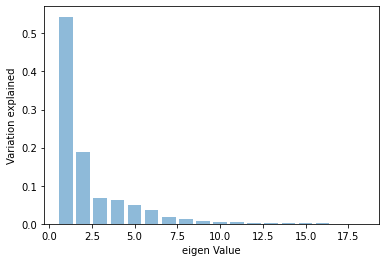

In [35]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center') #Plotting the bar graph for the variance explained by the new vectors.
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

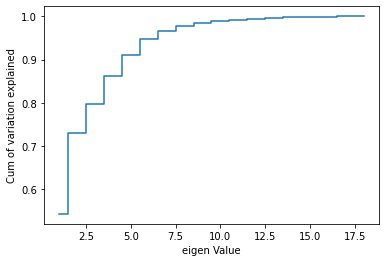

In [36]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid') #plotting the cummulative variance explained by the new vectors which are the linear combination of older components
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

##### Inference on the above plots:
    The percentage of variation explained by the new components is plotted to visualize and select the no.of componets that can explain the 95% of variation, the selection is much more easier in the second plot (elbow plot) than the first plot because in that plot we easily have cummulative percentage variation explained.  

#### Step 8:  Dimensionality Reduction:

Now with 8 components seems very reasonable. With 8 variables generated out of PCA can explain over 95% of the variation in the original data.

In [37]:
pca3 = PCA(n_components=8) # Reducing the Dimension using the PCA function available in the Sikit Learn package.
pca3.fit(x_1_sc) #Training the model
Xpca3 = pd.DataFrame(pca3.transform(x_1_sc))
Xpca3

0         1         2         3         4         5         6  \
0    0.589270 -0.654967 -0.566683  0.658591 -0.853448 -1.836087 -0.158646   
1   -1.527042 -0.327303 -0.248602 -1.296717 -0.283643 -0.092666  0.208980   
2    3.968101  0.239170 -1.231016 -0.183137  0.918459 -0.649556  0.826577   
3   -1.551971 -3.037633 -0.466390 -0.395756 -0.626094  0.382213  0.130613   
4    5.506694  4.665894  1.262347 -0.018293  1.668271  2.503255  0.262996   
..        ...       ...       ...       ...       ...       ...       ...   
808 -0.369922 -0.643066  1.480472 -0.160550  0.778296 -0.935492  0.873888   
809 -0.042671 -0.160611  0.473774  0.180102 -1.976811 -1.434481 -0.283183   
810  5.187469 -0.171877 -0.587935  0.884950 -1.351241  0.223799  0.887264   
811 -3.323429 -1.094843  1.931511 -0.335048 -0.527114 -0.031919 -0.267333   
812 -5.014584  0.432220  1.316505 -0.193447 -0.167618  0.346231 -0.409268   

            7  
0    0.686108  
1   -0.128316  
2   -0.163862  
3    0.175954  
4   -0.466181  
..        ...  
808 -0.193509  
809  0.305146  
810  0.429740  
811 -0.450215  
812  0.221963  

[813 rows x 8 columns]

##### Inference on the above plots:
    The eighteen dimensions are reduced to eight dimension without loosing the information, the each of the eight components which are orthogonal to ach other is a linear combination of 18 orginal attributes.

#### Step 9: Data Splitting:

In [38]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca3, y_1, test_size=0.3,stratify = y_1, random_state=2) # Splitting the data Cross Validation.

##### Inference on the above steps:
  The data is seperated into label and feature and again split into train and test samples with 70:30 proportions respectively, so now we can train and test the model. 

#### Step 10: Building the Support Vector Classifier model:

In [39]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp_pca =SVC( probability=True)
supp_vec_pca = GridSearchCV(supp_pca,params_grid)
#Fitting the training data into the model:
supp_vec_pca.fit(x_train_pca,y_train_pca)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 11: Fetching the best estimators and best parameters:

In [40]:
supp_vec_pca.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
supp_vec_pca.best_params_ #Extracting the best parameters.

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 12: Performance of the model on the validation data:

In [42]:
supp_vec_pca.best_score_ #extracfting the accuracy on training data.

0.9420035149384886

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the validation data upto 94.20% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [47]:
y_test_pred_supp_vec_pca = supp_vec_pca.predict(x_test_pca)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test_pca, y_test_pred_supp_vec_pca))) #evaluating the accuracy score.

Model Accuracy: 0.9262


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 92.62% accuracy, which is measured by comparing actual and predicted output (predicted using the model). A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. Presence of some more correlation between the features.
  3. Due to the removal of outliers. 
  4. Skewness of the most of the features.

#### Step 1: Building the model using hyperparameter tuning and strattified K fold CV:

In [48]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVC( probability=True)
strak = StratifiedKFold(n_splits = 10,shuffle=False, random_state=None)
supp_vec_stark_pca = GridSearchCV(supp,params_grid,cv=strak)
#Fitting the training data into the model:
supp_vec_stark_pca.fit(x_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [49]:
supp_vec_stark_pca.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
supp_vec_stark_pca.best_params_ #Extracting the best parameters.

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance of the model on validation data:

In [51]:
supp_vec_stark_pca.best_score_ #extracfting the accuracy on training data.

0.9543057996485061

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 93.38% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [53]:
y_test_pred_supp_vec_k_pca = supp_vec_stark_pca.predict(x_test_pca)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_supp_vec_k_pca))) #evaluating the accuracy score.

Model Accuracy: 0.9262


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 93.03% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. Presence of some more correlation between the features.
  3. Due to the removal of outliers. 
  4. Skewness of the most of the features.

=====================================================================================================================

# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

#### Conclusion:

In [54]:
comp_scores = pd.DataFrame({'Models':['Dropping Features without Strattified K-FoldCV','Dropping Features with Strattified K-FoldCV','Without dropping Features without Strattified K-FoldCV','With dropping Features with Strattified K-FoldCV', 'Models built using PCA Components without Strat K', 'Models built using PCA Components with Strat K'], 'Performance on Validation Data(in %)':[95.07, 95.07, 96.30, 97.18, 94.20, 95.03], 'Performance on Production Data (in %)':[94.67, 93.03, 95.08, 95.08, 92.62, 92.62 ] })
comp_scores

Models  \
0     Dropping Features without Strattified K-FoldCV   
1        Dropping Features with Strattified K-FoldCV   
2  Without dropping Features without Strattified ...   
3   With dropping Features with Strattified K-FoldCV   
4  Models built using PCA Components without Strat K   
5     Models built using PCA Components with Strat K   

   Performance on Validation Data(in %)  Performance on Testing Data (in %)  
0                                 95.07                               94.67  
1                                 95.07                               93.03  
2                                 96.30                               95.08  
3                                 97.18                               95.08  
4                                 94.20                               92.62  
5                                 95.03                               92.62

1. Upon comparing the preformances among the models built with and without feature elemination, model built using with and without K-Fold CV and model built using principal components indicate that modelel built without dropping the features(both with andd without K fold CV) gave the highest score on production data, if the things mentioned in the below points were done we might have seen difference senario in the model's performace like Model built using principal components might have got the highest performance.

2. On observation it can also be seen that the in the above iterations the models built With dropping Features with Stratified K-FoldCV gave the highest performance on the validation data than on the production data. 

2. Building the model instead of dropping the multicollinear features but with dropping the features that were found having poor relationship with the class could have changed the entire scenario itself that was found. But, it was not done because of the assumptioin that  our case study is a Classification of images.
 
2. The model performance could have improved the outliers were treated using methodologies like capping, etc,.

3. The model performance could have also improved or a different senario of the above could have been sighted if some basic feature engineering like adding/dividing the predictors was done but requieres some domain expertise.

4. The model performance could have also improved or a different senario of the above could have been sighted if the hypertuning of the model is done using RandomSearchCV.

5. We can aslo try the model building and see any performance changes by following some other feature elemination methods or combining the features that contained lower number of records.

6. The model tuning can also be done using the RandomSearchCV so that we may get better model performance.



=====================================================================================================================